## Bagging and Pasting
an ensemble of models, in which individual models are trained on different random subsets of training data

## Training Individual Decision trees
- sampling with replacement : bagging or bootstrap aggregration
- sampling without replacement : pasting

Bagging is usually preferred:
- tends to yield more uncorrelated predictors
- less overfitting (lower variance error)

## Demo : bagging and Pasting Regression

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
concrete_data = pd.read_csv("./datasets/concrete_data.csv")
concrete_data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [82]:
concrete_data.shape

(1030, 9)

In [83]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement              1030 non-null float64
slag                1030 non-null float64
flyash              1030 non-null float64
water               1030 non-null float64
superplasticizer    1030 non-null float64
coarseaggregate     1030 non-null float64
fineaggregate       1030 non-null float64
age                 1030 non-null int64
csMPa               1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


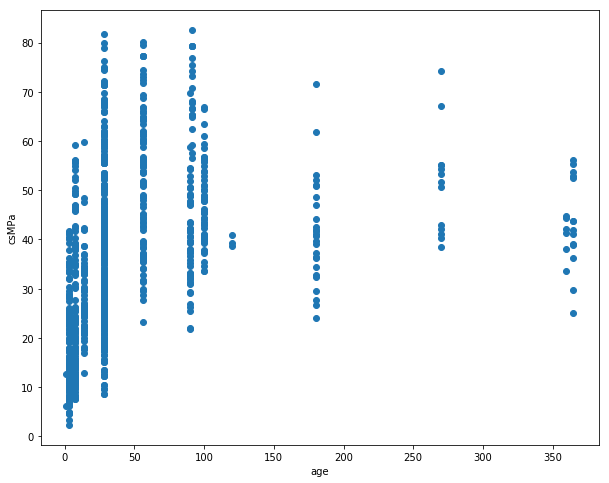

In [84]:
fig,ax = plt.subplots(figsize=(10,8))
plt.scatter(concrete_data['age'],concrete_data['csMPa'])
plt.xlabel("age")
plt.ylabel("csMPa")
plt.show()

It seems like there is a positive relationship, as the age increases, the strength seems to increase first and then decrease.

In [85]:
concrete_data_corr = concrete_data.corr()
concrete_data_corr

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


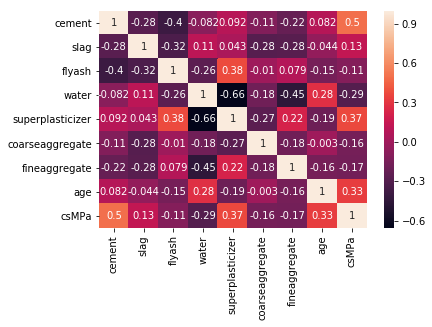

In [86]:
sns.heatmap(concrete_data_corr,annot=True)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = concrete_data.drop('csMPa',axis=1)
Y = concrete_data['csMPa']

In [89]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [90]:
x_train.shape,x_test.shape

((824, 8), (206, 8))

## using Pasting

In [91]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [92]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(),
                          n_estimators=500,
                          bootstrap=False,
                          max_samples = 1.0,
                          n_jobs = -1)
#n_estimators = number of predictors in our ensemble
# bootstrap = False , will use pasting(sampling without replacement)
# max_sample : percent of the trainig data to sample,1 means entire data
#n_jobs : number of  cores of the computer to use, -1 means as much as possible

In [93]:
bag_reg.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=F

In [94]:
y_pred = bag_reg.predict(x_test)

In [95]:
y_pred_actual = pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [96]:
y_pred_actual.sample(5)

,actual,predicted
472,44.42,57.03000
355,47.71,27.45980
66,44.70,44.21000
228,39.23,37.65092
445,36.56,35.10000


In [97]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8527293972669225

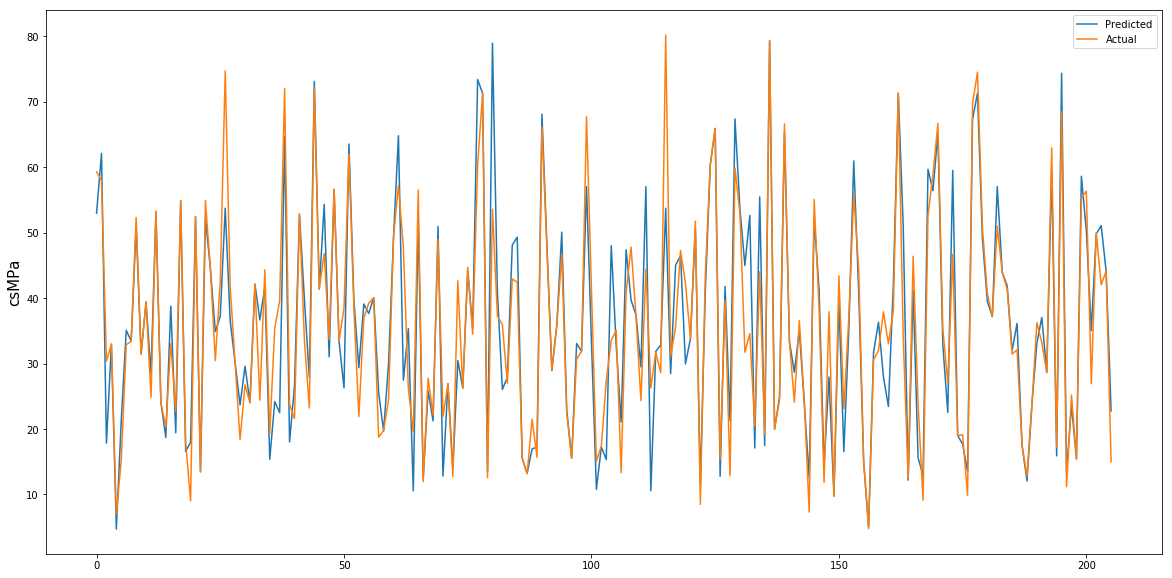

In [98]:
plt.figure(figsize=(20,10))
plt.plot(y_pred,label="Predicted")
plt.plot(y_test.values,label="Actual")

plt.ylabel('csMPa',fontsize=15)
plt.legend()
plt.show()

## Using Bagging

In [99]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(),
                          n_estimators=500,
                          bootstrap=True,
                          max_samples = 0.8,
                          n_jobs = -1,
                          oob_score=True)
#n_estimators = number of predictors in our ensemble
# bootstrap = True , will use bagging(samples will be replaced)
# max_sample : percent of the trainig data to sample,0.8 means 80% of the data will be used for training
#n_jobs : number of  cores of the computer to use, -1 means as much as possible
#oob_score : will conduct out-of-bag score to evaluate the predictor

In [100]:
bag_reg.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=T

In [101]:
bag_reg.oob_score_

0.9074031290853084

In [102]:
y_pred = bag_reg.predict(x_test)

In [103]:
r2_score(y_test,y_pred)

0.9119544481816864

## Random subspaces
keep all samples and choose only a subset of features to train predictors

In [104]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(),
                          n_estimators=500,
                          bootstrap=False,
                          max_samples = 1,
                          bootstrap_features = True,
                           max_features = 0.8,
                          n_jobs = -1)
#n_estimators = number of predictors in our ensemble
# bootstrap = True , will use bagging(samples will be replaced)
# max_sample : percent of the trainig data to sample,0.8 means 80% of the data will be used for training
#n_jobs : number of  cores of the computer to use, -1 means as much as possible
#bootstrap_features : use only a subset of features
bag_reg.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=F

In [105]:
y_pred = bag_reg.predict(x_test)
r2_score(y_test,y_pred)

-0.0004619902147275923